# 3D Computer Vision (2023/24)

## Exercise 2

Submitted by Group 25: 
- Juan Pablo Pino Bravo
- Mahmoud Abuhussien
- Vaishnavi Shirbhate
- Asmita Sengupta

Upload: 22.11.2023 (11:30)

**Deadline**: 05.12.2023 (23:59)

Please hand in a single **.zip** file named according to the pattern "**groupXX_exerciseX**" (e.g. group00_exercise9). The contents of the .zip should be as follows:
- folder named according to the pattern groupXX_exerciseX
    - **.ipynb** file
    - **.html** export of .ipynb with all the outputs you got
    - **data** folder containing necessary files to run the code

I.e.
1. **unzip** the provided exerciseX.zip file
2. **rename** folder "exerciseX" according to the pattern "groupXX_exerciseX"
3. **solve** tasks inside .ipynb file
4. **export** notebook as .html (File > Download as > HTML)
5. **zip** folder groupXX_exerciseX
6. **submit** groupXX_exerciseX.zip

## Theory

### T1. Homography

#### (a)
In order to map arbitrary 3D world coordinates to 2D image coordinates, we usually use the camera matrix P.
- Explain the reason, why we cannot apply 3x3 homographies in the general case.
- What are the two exceptional scenarios (regarding the type of scene and camera motion) where homographies appear between corresponding points?

#### Solution
1. Homographies assume all points lie on the same plane, neglecting depth variations in a 3D scene.
2. Homographies capture only intrinsic parameters of the camera, lacking information about the camera's position and orientation in 3D space.
3. Homographies work well for planar surfaces but break down when dealing with non-planar scenes, where points are distributed in three dimensions.

3x4 camera matrix P incorporates both intrinsic and extrinsic parameters, providing a more comprehensive model for accurate 3D-to-2D mapping in a general non-planar environment.

##### Exceptional scenarios
  - Purely rotating camera, arbitrary scene
  - Rotating and translating camera, planar scene

#### (b)
During the estimation of a homography using corresponding 2D points ($x, x'$):
- Why can we not use $x'-Hx=0$?
- What relation do we use instead?

#### Solution
- We cannot use $x'-Hx=0$ because scale is arbitrary in homographies. It is only true that $x' \propto Hx$.
- Instead, we start with the scale invariant relation $\lambda x' = Hx$ and use the cross product to remove scale factor $\lambda$. This gives us the relation $x' \times Hx = 0$.


### T2. Parameter Estimation

#### (a)
For linear parameter estimation, we construct linear systems of equations in the form of $Ax=0$, where $A$ are measurements.
- Why do we solve this as a minimization problem?
- What is the trivial solution and why do we have to avoid it?
- How do we reformulate problems of the form $argmin ||Ax||_2^2$, subject to $||x||_2^2=1$ to minimize them?

#### Solution
- We have to estimate the parameters as a minimization problem because the measurements are noisy and therefore we cannot find an exact closed form solution. This is because we get a system of equations that is overdetermined. By solving as a minimization problem, we can find the solution that gets us close to $Ax \approx 0$.
- The trivial solution is the zero vector, which is not useful because it does not provide any information about the parameters. We avoid it by constraining the parameters to have a norm of 1 (i.e. $||x||_2^2=1$).
- Using Lagrange multipliers, we can reformulate the problem as $argmin \left(||Ax||_2^2 + \lambda(1 -||x||_2^2)\right)$, where $\lambda$ is the Lagrange multiplier. We can then take the derivative with respect to $x$ and set it to zero to find the solution. The solution is the eigenvector corresponding to the smallest eigenvalue of $A^TA$.

#### (b)
Describe four advantages of non-linear parameter estimation methods over linear approaches.

#### Solution

1. Non-linear methods are generally more robust to measurement noise and outliers compared to linear approaches.

2. Non-linear methods effectively capture complex relationships in data that linear methods may struggle to represent.

3. Better at modeling dependencies that are non-linear, providing greater flexibility compared to linear methods.

4. Yield more accurate and precise parameter estimates than linear methods


#### (c)
Non-linear estimation methods minimize a different error formulation than linear methods.
<br/>
Name and mathematically formulate the common errors used for the estimation of the camera matrix $P$ and the homography $H$.

#### Solution


Non-linear estimation uses maximum likelihood estimation method by minimizing the reprojection error. 

### T3. Camera Center in Wold Coordinates
We are following the convention that a point $\textbf{X}_W$ in homogeneous world coordinates is transformed to camera coordinates as follows:
\begin{align*}
    \textbf{X}_C = [\textbf{R}\, |\, \textbf{t}]\, \textbf{X}_W.
\end{align*}

The camera center in world coordinates $\textbf{C}_{W}$ can be expressed in terms of the extrinsic camera parameters by
\begin{align*}
    \textbf{C}_{W}=-\textbf{R}^\mathsf{T}\textbf{t}.
\end{align*}

#### (a)
Prove that $\textbf{C}_W=-\textbf{R}^T\textbf{t}$.
<br/>
*(Hint: Where is the camera center in camera coordinates ($\textbf{C}_C$)?)*

#### Solution

\begin{align*}
    \textbf{X}_C & = [\textbf{R}\, |\, \textbf{t}]\, \textbf{X}_W \\ \\
    \begin{bmatrix}0 \\ 0 \\ 0 \\ 1 \end{bmatrix} & = [\textbf{R}\, |\, \textbf{t}]\, \textbf{C}_W \\
\end{align*}

This leads to the system of equations:
\begin{align*}
   \begin{cases} \textbf{RC}_W + \textbf{t} = \textbf{0} \\ 1 = 1 \end{cases}\\
\end{align*}

Multiply both sides of the first equation by $\textbf{R}^T$:
\begin{align*}
   \textbf{R}^T\textbf{RC}_W + \textbf{R}^T\textbf{t} &= \textbf{0} \\
   \textbf{R}^T\textbf{R} &= \textbf{I} \\
   \textbf{C}_W + \textbf{R}^T\textbf{t}& = \textbf{0} \\
   \textbf{C}_W &= -\textbf{R}^T\textbf{t}
\end{align*}

#### (b)
In this context, illustrate the meaning of $\textbf{t} = -\textbf{R}\textbf{C}_W$ using **a few sentences**.
<br/>
I.e. from where to where does this vector point, considering the world and camera coordinate systems?
<br/>
*(Hint: We recommend using a piece of paper and drawing on it to visualize everything for yourself before answering.)*

#### Solution

In the expression t=−RCw, translation vector (t) points from the camera coordinate system to the world coordinate system.
Cw represents the position of the camera in the world coordinate system.
R is the rotation matrix representing the orientation of the camera. When multiplied by Cw, it transforms the camera center from the world coordinate system to the camera coordinate system.
−RCw: The negative sign indicates a transformation in the opposite direction.

The vector t represents the displacement from the camera origin in the camera coordinate system to the camera center in the world coordinate system. It tells us how much the camera has moved and in which direction in the world coordinate system

## Implementation


### I1. Transformation Hierarchy
We have seen some examples of transformation hierarchies in the lecture. In this task, you can experiment with the effects of modifying different values of a homography, which is applied to a square.
The given code draws a square before transformation in blue and a square after transformation by $\textbf{h}$ in red.

#### (a)
Experiment to find a homography that creates a figure **similar** to the following example.
<br/>
*(Hint: Consider which type of homography matches the seen transformation and adjust your homography incrementally. It does not have to be a perfect match.)*
![coordinate_transform](figures/homography.png)

In [ ]:
'''You should not need any additional imports'''
import matplotlib.pyplot as plt
import numpy as np


Using homography:
[[ 0.5 -0.5  1. ]
 [ 0.5  0.5  0. ]
 [ 0.   0.   1. ]]


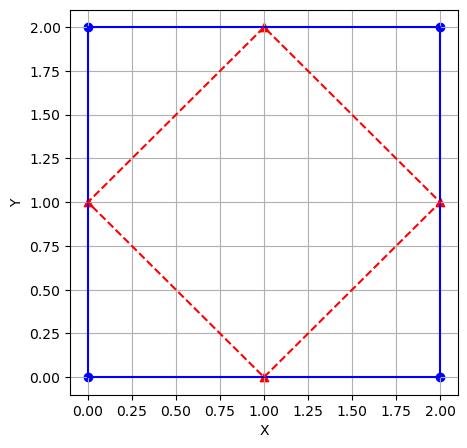

In [132]:
'''Experiment by changing the values of the homography here!'''


# Area of the new square is 1/2 of the original square 
# A1 = l1^2
# A2 = l2^2
# A2 = 1/2 * A1
# l2^2 = 1/2 * l1^2
# l2 = sqrt(1/2) * l1
# s = l2/l1 = sqrt(1/2)
s = np.sqrt(1/2)
deg = 45 * np.pi/180
sin = np.sin(deg)
cos = np.cos(deg)
h = np.array([s * cos, -s * sin, 1,
              s * sin, s * cos, 0,
              0, 0, 1]).reshape(3,3)
print("Using homography:")
print(h)

# corners of the square
xy = np.array([[0,0],[2,0],[2,2],[0,2]])#[4, 2]
# add homogenous coordinate
xy = np.concatenate([xy, np.ones_like(xy[:,:1])], axis=1)#[4, 3]
# apply homography
xy_h = np.matmul(h, xy.reshape(-1, 3, 1)).reshape(-1, 3)#[3,3]*[4,3,1]=[4,3,1]-> [4,3]
# normalize
xy_hn = xy_h/xy_h[:,2:]

#Create figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('X')
ax.set_ylabel('Y')

#scatter points of the square and draw lines
ax.scatter(xy[:,0], xy[:,1], marker='o', color='blue')
ax.plot(np.concatenate([xy[:,0],xy[:1,0]], axis=0),
        np.concatenate([xy[:,1],xy[:1,1]], axis=0), color='blue')
#scatter points of the square after applying the homography and draw lines
ax.scatter(xy_hn[:,0], xy_hn[:,1], marker='^', color='red')
ax.plot(np.concatenate([xy_hn[:,0],xy_hn[:1,0]], axis=0),
        np.concatenate([xy_hn[:,1],xy_hn[:1,1]], axis=0), color='red', linestyle='dashed')

plt.grid()
plt.show()


#### (b)
Which type of homography was used to create the transformation from the previous subtask **(a)**? Name the type that matches it the closest.
<br/>
Argue based on the properties you can see and the results of your experimentations that lead to a similar homography.

#### Solution

It is a similarity transformation, which allows for rotation, scaling and translation. It preserves ratios of length, angle, ratios of areas, parallel lines. The transformation is a rotation by 45 deg, a scaling by sqrt(1/2) and a translation on thex axis by 1. The new square has an area of 0.5 times the original square which leads to the scaling factor of sqrt(1/2). The rotation is 45 degrees. To center the square, the translation is 0.5 times the width of the square original square. in the x axis.

### I2. Relative Rotation Estimation from Homography
A homography between two images taken with the same camera can be used to compute the relative rotation $\textbf{R}_{rel}$ when the camera has undergone a pure rotation, i.e. no translation between the two views.
<br/>
For the following tasks, you find the required intrinsic parameters of the camera ($\alpha_x, \alpha_y, x_0, y_0, s$) and the homographies $\textbf{H}_i$ in the file **data/calib.mat**.

From the lecture we know the following equations which relate *Homography*, *Rotation*, and *Intriniscs*

\begin{align*}
    H = K\,R\,K^{-1}
    \implies R = K^{-1}\,H\,K
\end{align*}

We are given the following homography matrices:
- H<sub>1</sub> obtained after pure rotation
    - We expect the rotation recovered from $H_{1}$ to be pure rotation
- H<sub>2</sub> after a manual rotation
    - Rotation recovered from $H_{2}$ might not be a proper rotation matrix therefore we need to perform some  corrections

In [23]:
'''You can add all your imports here'''
import numpy as np
import scipy.io as io


#### (a)
Write a function **load_data** that does the following:
- Load the two homographies and construct the calibration matrix

The inputs should be:
- A string with the path of the data file

The outputs should be:
- A dictionary containing **at least** the following:
    - camera matrix $K$
    - homography $H_1$
    - homography $H_2$

In [134]:
def load_data(file_name):
    '''Load data from a .mat file'''
    data = io.loadmat(file_name)
    return { 
        "K" : np.array([[data["alpha_x"][0][0], data["s"][0][0], data["x_0"][0][0]], [0, data["alpha_y"][0][0], data["y_0"][0][0]], [0, 0, 1]]),
        "H1": data["H1"],
        "H2": data["H2"],
    }

load_data('data/calib.mat')


{'K': array([[5500,    0, 2376],
        [   0, 5500, 1632],
        [   0,    0,    1]]),
 'H1': array([[ 4.32000e-01,  0.00000e+00, -6.52643e+03],
        [ 2.96727e-01,  1.00000e+00, -2.33702e+03],
        [ 1.81818e-04,  0.00000e+00, -4.32000e-01]]),
 'H2': array([[-4.68504e-02,  9.90566e-01,  8.89185e+02],
        [-1.00065e+00, -3.73135e-02,  4.26905e+03],
        [-4.00000e-07, -2.58182e-06,  1.05136e+00]])}

#### (b)
Write a function **compute_relative_rotation** that does the following:
- Computes the relative rotation between two images based on a homography
- As an option: corrects the rotation matrix

The inputs should be:
- A Homography
- The Calibration matrix
- A flag for correction

The outputs should be:
- The (relative) rotation matrix

In [126]:
def compute_relative_rotation(H, K, correct=False):
    R = np.linalg.inv(K) @ H @ K
    if correct:
        # Correct rotation matrix using SVD
        U, _, V = np.linalg.svd(R) 
        R = U @ V.T
    return R


#### (c)
Write code that executes the following steps:
- Call **load_data** on the provided data file
- Call **compute_relative_rotation** for $H_1$
- Compute whether the result is a proper rotation matrix
- Call **compute_relative_rotation** for $H_2$
- Compute whether the result is a proper rotation matrix

*(Hint: Check the definitions of a rotation matrix to find a way to compute its correctness)*

In [135]:
def is_rotation_matrix(R):
    # Verify that R1 is a rotation matrix
    # A rotation matrix is orthogonal and has determinant 1
    # A matrix is orthogonal if R^T * R = I
    det = np.linalg.det(R)
    I = R.T @ R
    Z = np.abs(I) - np.identity(3)
    return np.isclose(det, 1) and np.allclose(Z, 0, atol=1e-05)

data = load_data('data/calib.mat')

K = data["K"]
H1 = data["H1"]
H2 = data["H2"]

R1 = compute_relative_rotation(H1, K)
print("R1:", R1)
print("Is R1 a rotation matrix?", is_rotation_matrix(R1))

R2 = compute_relative_rotation(H2, K)
print("R2:", R2)
print("Is R2 a rotation matrix?", is_rotation_matrix(R2))


R1: [[ 4.32000000e-07  0.00000000e+00 -9.99999450e-01]
 [ 2.40000000e-08  1.00000000e+00  7.37640727e-07]
 [ 9.99999000e-01  0.00000000e+00 -4.32000000e-07]]
Is R1 a rotation matrix? True
R2: [[-0.0459      0.9967004  -0.01659813]
 [-0.9999972  -0.03309997  0.02240327]
 [-0.0022     -0.01420001  1.04619607]]
Is R2 a rotation matrix? False


#### (d)
Write code that executes the following steps:
- Call **compute_relative_rotation** for $H_2$, using the correction flag
- Compute whether the result is a proper rotation matrix and compare to before

In [128]:
R2_corrected = compute_relative_rotation(H2, K, correct=True)
print("R2 corrected:", R2_corrected)
print("Is R2 corrected a rotation matrix?", is_rotation_matrix(R2_corrected))


R2 corrected: [[-0.8135403   0.57037867 -0.11322696]
 [ 0.33611292  0.30233539 -0.89197613]
 [-0.47453164 -0.76371558 -0.43767367]]
Is R2 corrected a rotation matrix? True


#### (e)
Why does the rotation matrix computed from $\textbf{H}_2$ need correction?

#### Solution


Real data might be noisy, which can lead to an invalid rotation matrix. We can use SVD to make the matrix orthogonal by setting the singular values to 1.